<a href="https://colab.research.google.com/github/HadiTajari/MNIST-Classification-Dense-vs-Conv-Layers/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MNIST Classification in Deep Learning

## 1) MNIST Classification Using Dense Layers (MLP)


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

### Let us load and Prepration Dataset

In [ ]:
(train_images , train_lables), (test_images, test_lables) = datasets.mnist.load_data()
print ( "train_images dimentions: " , train_images.ndim)    # dimantionary of train data
print ( "train_images shape: ", train_images.shape)         # shape of train data

11490434/11490434 [==============================] - 2s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)


In [ ]:
# preprocessing data
X_train = train_images.reshape(60000, 784)   
X_test = test_images.reshape(10000, 784)

# scaling X (normalizing)                   #(x- min)/(max - min)
X_train = X_train.astype("float32") / 255       #we know the max of any image pixel is 255 and min is 0
X_test = X_test.astype("float32") / 255

# one hot enconding lables
y_train = utils.to_categorical(train_lables)
y_test = utils.to_categorical(test_lables)

print(train_lables[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Visualization of some X

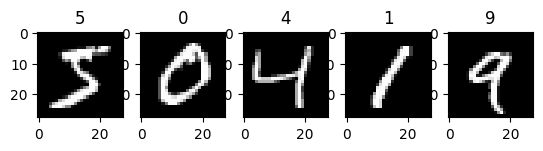

In [ ]:
for i in range(5):
  plt.subplot(1, 5 , i+1)
  plt.imshow(train_images[i], cmap= "gray")
  plt.title(train_lables[i])

### Model Craetion

In [ ]:
myModel = models.Sequential()
myModel.add(layers.Dense(500, activation = "relu", input_shape= (784,)))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(100, activation = "relu"))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(10, activation = "softmax"))  # we have 10 lables so we put in the finall lyers 100 and softmax, if we had 2 lables we must input 2 and binarymax

myModel.summary()
myModel.compile(optimizer= optimizers.SGD(lr = 0.001), loss=losses.categorical_crossentropy)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


## Training and Fiting Model

In [ ]:
history = myModel.fit(X_train, y_train, batch_size= 128, epochs = 20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 6s 4ms/step - loss: 1.3636 - val_loss: 0.6313
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6474 - val_loss: 0.4179
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5005 - val_loss: 0.3481
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4370 - val_loss: 0.3128
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3964 - val_loss: 0.2886
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3694 - val_loss: 0.2705
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3420 - val_loss: 0.2556
Epoch 8/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3241 - val_loss: 0.2420
Epoch 9/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3085 - val_loss: 0.2312
Epoch 10/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2942 - val_loss: 0.2225

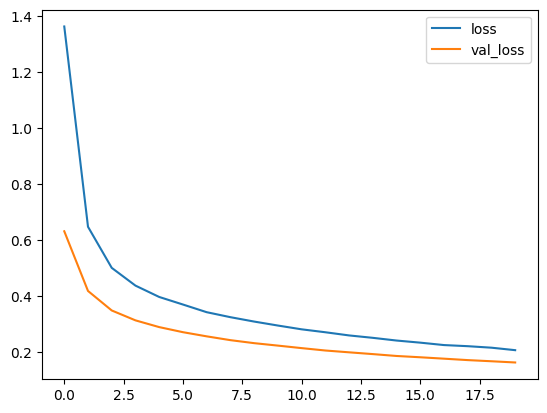

In [ ]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]
plt.plot(losses)
plt.plot(val_losses)
plt.legend(["loss", "val_loss"])

In [ ]:
# if loss plot decreases but val_loss is constant or increasingTit indicates that the model is overfitted.

In [ ]:
# Evaluation
test_loss = myModel.evaluate(X_test, y_test)
print("test loss: ", test_loss)

# Prediction
test_lables_p = myModel.predict(X_test)
test_lables_p = np.argmax(test_lables_p , axis=1)

print("True Lables: ", test_lables[1:10])
print("Pred Lables: ", test_lables_p[1:10])

313/313 [==============================] - 1s 4ms/step - loss: 0.1595
test loss:  0.15952453017234802
313/313 [==============================] - 1s 2ms/step
True Lables:  [2 1 0 4 1 4 9 5 9]
Pred Lables:  [2 1 0 4 1 4 9 6 9]


## 2) MNIST Classification with Convolutional Layers

In [5]:
# Loadin Dataset
(train_images , train_lables), (test_images, test_lables) = datasets.mnist.load_data()
print ( "train_images dimentions: " , train_images.ndim)    # dimantionary of train data
print ( "train_images shape: ", train_images.shape)         # shape of train data

11490434/11490434 [==============================] - 2s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)


In [6]:
# prepration dataset and spliting to train and test datasets
X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

# Normalizing X
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = utils.to_categorical(train_lables)
y_test = utils.to_categorical(test_lables)

print(train_lables[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Data visualization

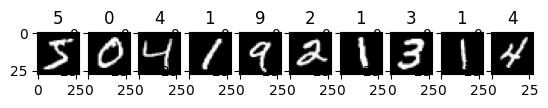

In [15]:
for i in range(10):
  plt.subplot(1, 10 , i+1)
  plt.imshow(train_images[i], cmap="gray")
  plt.title(train_lables[i])


In [16]:
# Creating Model and layers
myInput = layers.Input(shape =(28, 28, 1))
conv1 = layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu", padding = "same", strides= 2)(myInput)  #stirdes = 2 == > devided shape in any layers
conv2 = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same", strides = 2)(conv1)
flat = layers.Flatten()(conv2)  # 2D to 1D 
out_layer = layers.Dense(10, activation = "softmax")(flat)

myModel = models.Model(myInput, out_layer)
myModel.summary()
myModel.compile(optimizer = optimizers.SGD(lr = 0.001), loss = losses.categorical_crossentropy)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                15690     
                                                                 
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training and Fititng
history = myModel.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 12s 5ms/step - loss: 1.8602 - val_loss: 0.6979
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4933 - val_loss: 0.3710
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3774 - val_loss: 0.3269
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3427 - val_loss: 0.3013
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3191 - val_loss: 0.2890
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2990 - val_loss: 0.2697
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2824 - val_loss: 0.2590
Epoch 8/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2656 - val_loss: 0.2440
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2500 - val_loss: 0.2313
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2353 - val_loss: 0.219

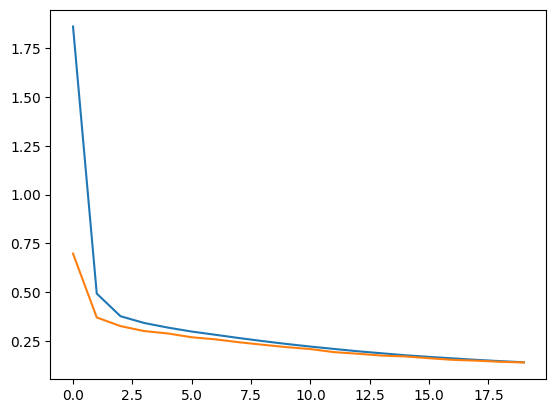

In [22]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]

plt.plot(losses)
plt.plot(val_losses)

In [24]:
# Evaluation
test_loss = myModel.evaluate(X_test, y_test)
print("test loss: ", test_loss)


test_lable_p = myModel.predict(X_test)
test_lable_p = np.argmax(test_lable_p, axis = 1 )

print( "True Lables: " , test_lables[0:10])
print(" Pres Lables: " , test_lable_p[0:10])

313/313 [==============================] - 1s 3ms/step - loss: 0.1350
test loss:  0.13504821062088013
313/313 [==============================] - 1s 2ms/step
True Lables:  [7 2 1 0 4 1 4 9 5 9]
 Pres Lables:  [7 2 1 0 4 1 4 9 6 9]
